In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import pickle 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM

In [2]:
df = pd.read_csv('clean_data.csv',index_col=0)
df.head()

,clean_text,label
0,oily creamy expected ordered try highlight con...,0
1,palette decent price looking different shades ...,0
2,texture concealer pallet fantastic great cover...,0
3,really tell exactly thing powder kind oil ish ...,0
4,little smaller expected okay lasted long time ...,0


In [3]:
df['clean_text'] = df['clean_text'].apply(lambda x:str(x))

In [4]:
x = df['clean_text']
y = df['label']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

## Tokenization

In [6]:
tok = Tokenizer(oov_token = '<UNK>')

In [7]:
# we fit only on training data and just transform that on testing data

In [8]:
#fitting on training data
tok.fit_on_texts(x_train)

In [9]:
len(tok.word_index)

92705

In [10]:
# just transforming the test data
train_sequences = tok.texts_to_sequences(x_train)
test_sequences = tok.texts_to_sequences(x_test)

In [11]:
with open('filename.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Padding

(array([77860., 78817., 41276., 23841., 14107.,  8816.,  5736.,  3758.,
         2619.,  1945.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

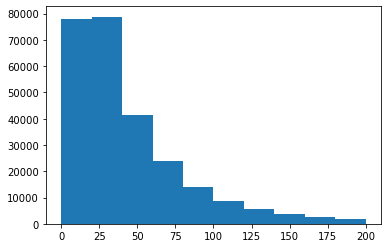

In [12]:
plt.hist(df['clean_text'].apply(lambda x:len(x.split())),range = (0,200))

In [13]:
x_train = pad_sequences(train_sequences,maxlen=100,padding='pre',truncating='pre')
x_test = pad_sequences(test_sequences,maxlen=100,padding='pre',truncating='pre')

## Model Fitting

In [14]:
model = Sequential([
    Embedding(92706,300),
    LSTM(128),
    Dense(100,activation='relu'),
    Dense(6,activation='softmax')  
    
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         27811800  
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 28,044,954
Trainable params: 28,044,954
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss= 'SparseCategoricalCrossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(x_train,y_train,batch_size=500,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
371/371 [==============================] - 384s 1s/step - loss: 0.3748 - accuracy: 0.8619 - val_loss: 0.1764 - val_accuracy: 0.9416
Epoch 2/10
371/371 [==============================] - 354s 954ms/step - loss: 0.1130 - accuracy: 0.9637 - val_loss: 0.1643 - val_accuracy: 0.9471
Epoch 3/10
371/371 [==============================] - 768s 2s/step - loss: 0.0807 - accuracy: 0.9741 - val_loss: 0.1684 - val_accuracy: 0.9479
Epoch 4/10
371/371 [==============================] - 359s 967ms/step - loss: 0.0636 - accuracy: 0.9792 - val_loss: 0.1780 - val_accuracy: 0.9467
Epoch 5/10
371/371 [==============================] - 583s 2s/step - loss: 0.0514 - accuracy: 0.9832 - val_loss: 0.2016 - val_accuracy: 0.9443
Epoch 6/10
371/371 [==============================] - 660s 2s/step - loss: 0.0430 - accuracy: 0.9860 - val_loss: 0.2152 - val_accuracy: 0.9407
Epoch 7/10
371/371 [==============================] - 716s 2s/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.2376 - val_accuracy: 

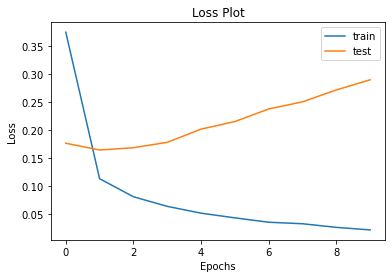

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend(['train','test'])

In [19]:
model.save('LSTM_Model.h5')